In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
data = pd.read_csv('Social_Network_Ads.csv')

In [57]:
data.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [58]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [59]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [60]:
data['Gender'].replace(['Male','Female'], [0, 1], inplace=True)

In [61]:
data.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0
5,15728773,0,27,58000,0
6,15598044,1,27,84000,0
7,15694829,1,32,150000,1
8,15600575,0,25,33000,0
9,15727311,1,35,65000,0


In [62]:
data.corr()

,User ID,Gender,Age,EstimatedSalary,Purchased
User ID,1.000000,0.025249,-0.000721,0.071097,0.007120
Gender,0.025249,1.000000,0.073741,0.060435,0.042469
Age,-0.000721,0.073741,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.060435,0.155238,1.000000,0.362083
Purchased,0.007120,0.042469,0.622454,0.362083,1.000000


<Axes: >

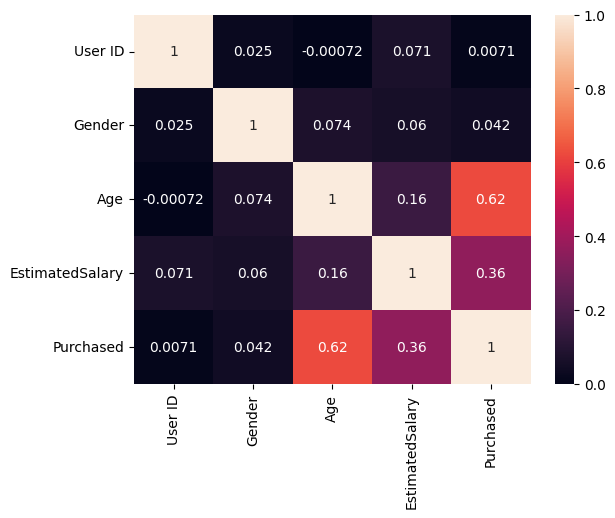

In [63]:
sns.heatmap(data.corr(), annot=True )

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

In [65]:
X = data[['Age', 'EstimatedSalary']]
Y = data['Purchased']

In [66]:
X_train,X_test, Y_train,  Y_test = train_test_split(X,Y, test_size=0.2)

In [67]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [68]:
model = LogisticRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

In [69]:
model.score(X_train, Y_train)

0.83125

In [70]:
model.score(X_test, Y_test)

0.8875

In [71]:
mean_squared_error(Y_test, Y_pred)

0.1125

<Axes: >

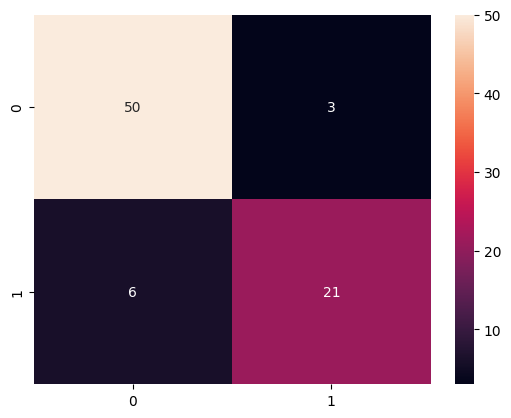

In [72]:
confMat = confusion_matrix(Y_test, Y_pred)
sns.heatmap(confMat, annot=True)

In [73]:
print('Accuracy :', accuracy_score(Y_test, Y_pred))
print('Precision :', precision_score(Y_test, Y_pred))
print('Recall :', recall_score(Y_test, Y_pred))
print('f1 :', f1_score(Y_test, Y_pred))

Accuracy : 0.8875
Precision : 0.875
Recall : 0.7777777777777778
f1 : 0.8235294117647058
